### Mask-RCNN DataLoader. Common objects in context COCO dataset

In [1]:
import os
import matplotlib.pyplot as plt
os.chdir('../src')

from samples.coco import coco
from preprocess import preprocess
from preprocess import augmentation as aug

%matplotlib inline

In [2]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2021-09-25T15:46:40.731403+03:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 5.4.0-65-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

matplotlib: 3.2.2



In [3]:
base_dir = r'/media/alexander/Samsung_T5/temp/coco2017'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [4]:
from common.config import CONFIG

In [5]:
CONFIG.update(coco.COCO_CONFIG)
CONFIG

{'image_shape': (512, 512, 3),
 'img_size': 512,
 'backbone': 'mobilenet',
 'meta_shape': 93,
 'num_classes': 81,
 'class_dict': {'background': 0,
  'person': 1,
  'bicycle': 2,
  'car': 3,
  'motorcycle': 4,
  'airplane': 5,
  'bus': 6,
  'train': 7,
  'truck': 8,
  'boat': 9,
  'traffic light': 10,
  'fire hydrant': 11,
  'stop sign': 12,
  'parking meter': 13,
  'bench': 14,
  'bird': 15,
  'cat': 16,
  'dog': 17,
  'horse': 18,
  'sheep': 19,
  'cow': 20,
  'elephant': 21,
  'bear': 22,
  'zebra': 23,
  'giraffe': 24,
  'backpack': 25,
  'umbrella': 26,
  'handbag': 27,
  'tie': 28,
  'suitcase': 29,
  'frisbee': 30,
  'skis': 31,
  'snowboard': 32,
  'sports ball': 33,
  'kite': 34,
  'baseball bat': 35,
  'baseball glove': 36,
  'skateboard': 37,
  'surfboard': 38,
  'tennis racket': 39,
  'bottle': 40,
  'wine glass': 41,
  'cup': 42,
  'fork': 43,
  'knife': 44,
  'spoon': 45,
  'bowl': 46,
  'banana': 47,
  'apple': 48,
  'sandwich': 49,
  'orange': 50,
  'broccoli': 51,
  'ca

In [6]:
train_dataset = coco.CocoDataset(dataset_dir=base_dir,
                                 subset='train',
                                 year=2017,
                                 auto_download=False,
                                 preprocess_transform=preprocess.get_input_preprocess(
                                     normalize=CONFIG['normalization']
                                 ),
                                 augmentation=aug.get_training_augmentation(),
                                 **CONFIG
                                )

val_dataset = coco.CocoDataset(dataset_dir=base_dir,
                               subset='val',
                               year=2017,
                               auto_download=False,
                               preprocess_transform=preprocess.get_input_preprocess(
                                   normalize=CONFIG['normalization']
                               ),
                               **CONFIG
                              )

train_dataloader = preprocess.DataLoader(train_dataset,
                                         shuffle=True,
                                         name='train',
                                         **CONFIG
                                        )
val_dataloader = preprocess.DataLoader(val_dataset,
                                       shuffle=False,
                                       name='val',
                                       **CONFIG
                                      )

None passed to images_dir argument.
 This means that the dataset class is a child of SegmentationDataset and its behaviour differs from datasets created with VGG Image Annotator.
 If it is not true, please, check your class arguments carefully.

loading annotations into memory...
Done (t=9.94s)
creating index...


  0%|          | 0/117266 [00:00<?, ?it/s]

index created!


100%|██████████| 117266/117266 [00:01<00:00, 78022.43it/s]


None passed to images_dir argument.
 This means that the dataset class is a child of SegmentationDataset and its behaviour differs from datasets created with VGG Image Annotator.
 If it is not true, please, check your class arguments carefully.

loading annotations into memory...


100%|██████████| 4952/4952 [00:00<00:00, 84386.74it/s]

Done (t=0.27s)
creating index...
index created!
train DataLoader. Steps per epoch: 117266
val DataLoader. Steps per epoch: 4952


Create data generators for training and validation

In [7]:
train_iterated = iter(train_dataloader)
val_iterated = iter(val_dataloader)

In [8]:
train_batch = next(train_iterated)

In [9]:
for x in train_batch[0]:
    print(x.shape)

(1, 512, 512, 3)
(1, 93)
(1, 65472, 1)
(1, 256, 4)
(1, 100)
(1, 100, 4)
(1, 512, 512, 100)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


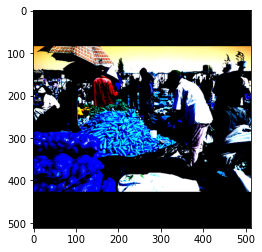

In [10]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(train_batch[0][0][i])

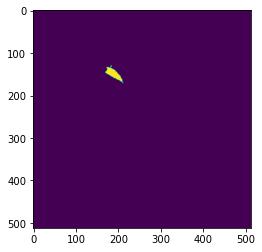

In [11]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(train_batch[0][6][i][:, :, 0])

In [12]:
val_batch = next(val_iterated)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


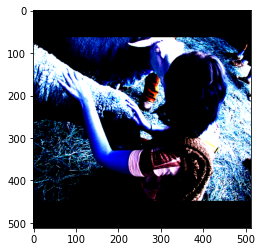

In [13]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(val_batch[0][0][i])

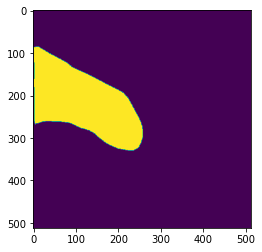

In [14]:
for i in range(CONFIG['batch_size']):
    fig = plt.figure()
    plt.imshow(val_batch[0][6][i][:, :, 0])